# SC4003 CE/CZ4046 INTELLIGENT AGENTS - Assignment 1


This Jupyter notebook is used to present the usage of the algorithms implemented for the assignment. The algorithms are implemented in the `algorithms` folder. The algorithms are implemented in the following files:
1. `value_iteration.py` - Value Iteration algorithm
2. `policy_iteration.py` - Policy Iteration algorithm

Also, this notebook main purpose is to visualize the results of the algorithms. The same results are also presented in the report.

## Introduction

Environment:
The environment in the assignment is a 6x6 grid maze with 4 different types of cells:
1. Normal cell (The white empty cells)
2. Wall cell (The grey cells)
3. Reward cell (The green cells)
4. Hole/Penalty cell (The orange cells)

Actions:
The agent can move in 4 directions: up, down, left, right. The agent cannot move into a wall cell or go outside the grid.

Transition Model:
The transition model of the agent in the environment is as follows:
1. The agent moves in the intended direction with a probability of 0.8
2. The agent moves in either of the right or left direction of the intended direction with a probability of 0.1 each

Terminal State:
There is no terminal state in the environment. The agent can move in the environment infinitely. Also, none of the cells disappear or change their type.

Rewards:
1. Reward cell: +1
2. Hole/Penalty cell: -1
3. Normal cell: -0.04

## 1. Task 1 - Base Environment

The goal of this task is to design Value Iteration and Policy Iteration algorithms to find the optimal policy and utility values for the base environment.

### 1.1. Value Iteration

Importing the required libraries for the value iteration algorithm and visualization of the results.

In [1]:
from config import *
from algorithms.value_iteration import *
from algorithms.algorithm_utils import *
import pandas as pd
import matplotlib.pyplot as plt

pygame-ce 2.4.1 (SDL 2.28.5, Python 3.8.18)


Visualizing the maze environment

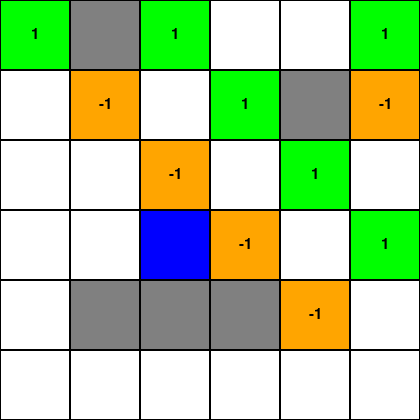

In [2]:
# Import the PIL library to visualize the environment
from PIL import Image

set_maze_config('base')
base_env_image_name = 'base_env'

# Run the function to visualize the environment and save the screenshot for later use
visualize_env(base_env_image_name)

# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + f'{base_env_image_name}.png')
img

Now initialize the environment and run the value iteration algorithm to find the optimal policy and utility values.
Show the number of iterations it took to converge and visualize the optimal policy.

In [3]:
vi_env = init_vi_env()  # Initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env)  # Perform value iteration
vi_policy = generate_policy(vi_env)  # Generate the optimal policy
print(f'Value Iteration converged in {vi_iterations_cnt} iterations')

Value Iteration converged in 1145 iterations


Visualizing the optimal policy

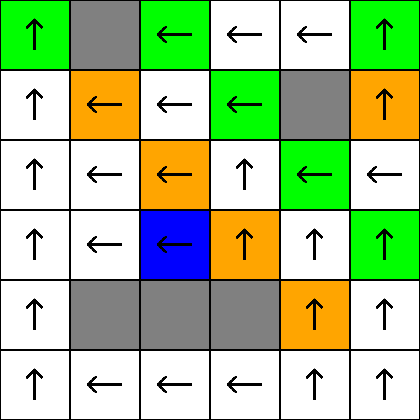

In [4]:
vi_policy_image_name = 'value_iteration_policy'
visualize_policy(vi_policy, vi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{vi_policy_image_name}.png')
img

Visualizing the utility values

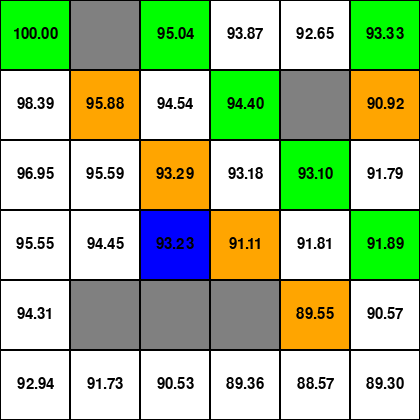

In [5]:
vi_utility_image_name = 'value_iteration_utility'
visualize_utility(vi_env, vi_utility_image_name)  # Visualize the utility values and save the screenshot for later use

# Load the screenshot of the utility values 
img = Image.open(get_path() + '/window_capture/' + f'{vi_utility_image_name}.png')
img

Visualizing the learning curve of the value iteration algorithm

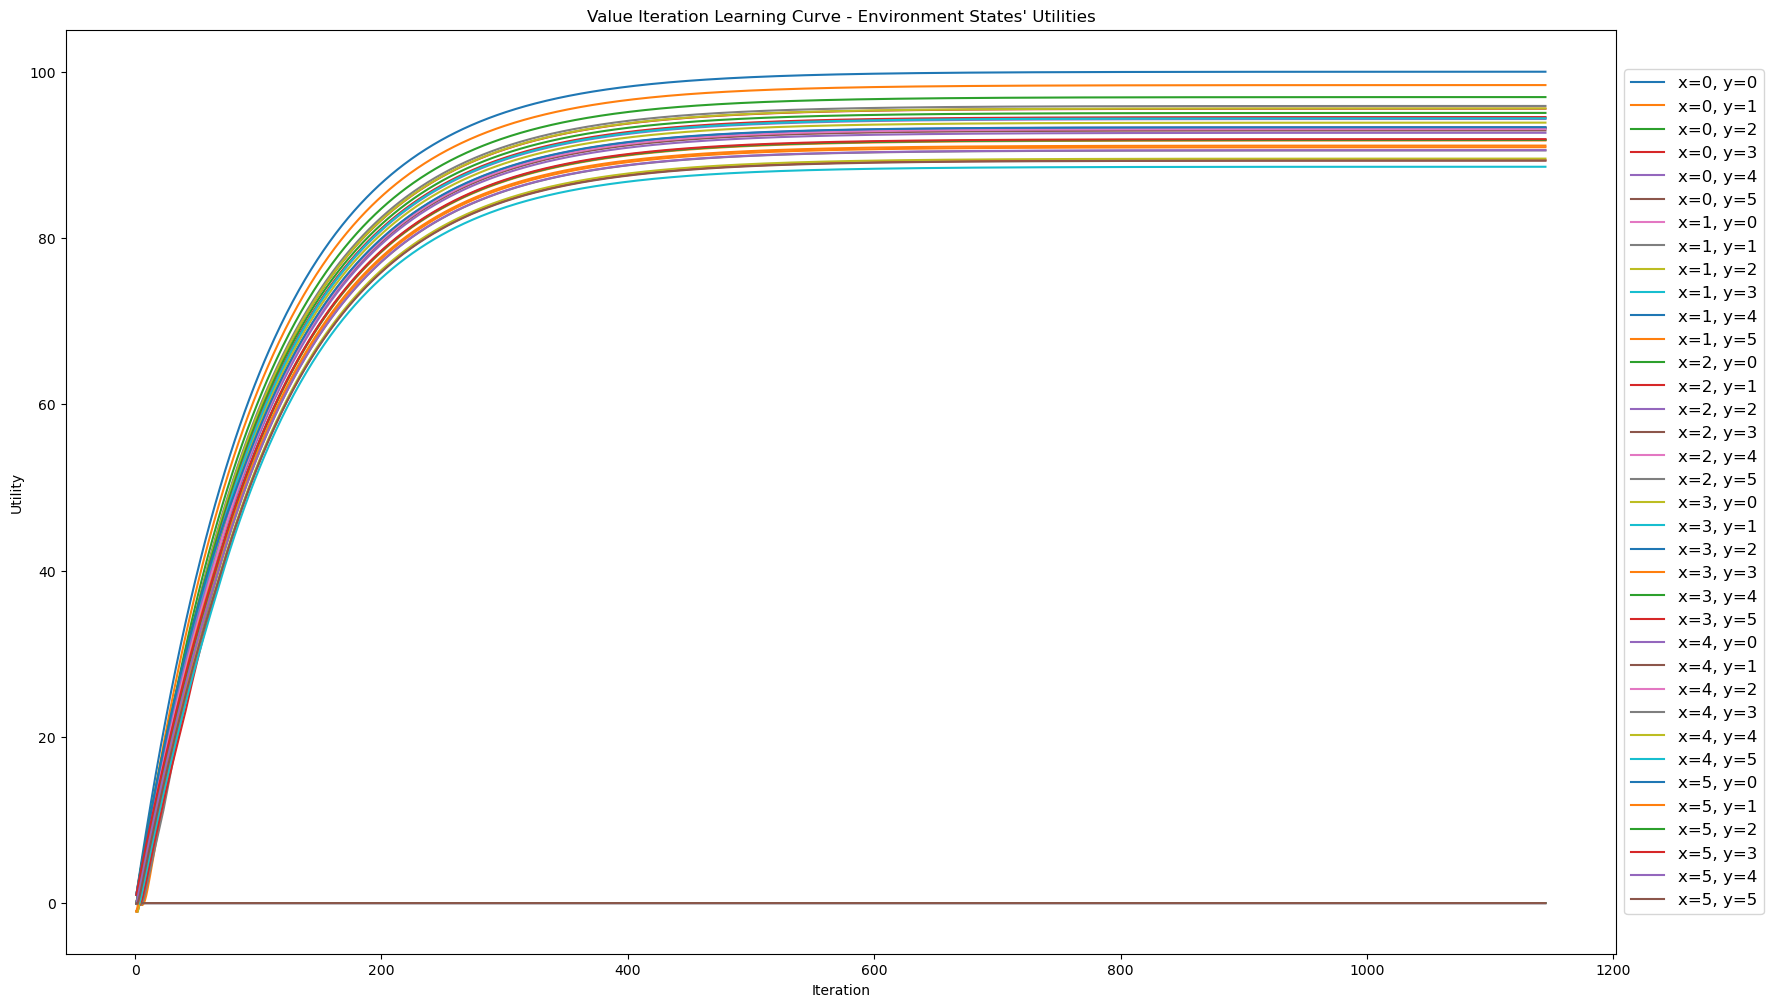

<Figure size 640x480 with 0 Axes>

In [6]:
# Visualize the learning curve of the value iteration algorithm
vi_results = pd.read_csv(get_path() + '/results/value_iteration/vi_results.csv')

# Group the results by the 'x' and 'y' columns
groups = vi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Value Iteration Learning Curve - Environment States' Utilities")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'value_iteration_learning_curve.png')

### 1.2. Policy Iteration

In [7]:
from algorithms.policy_iteration import *

Visualizing the maze environment

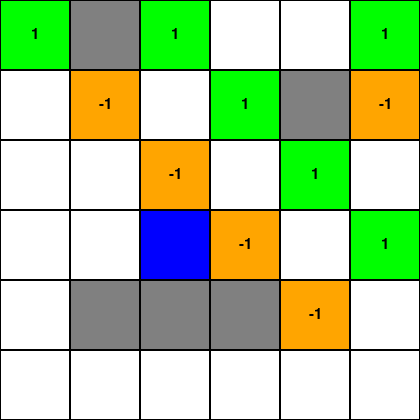

In [8]:
# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + 'base_env.png')
img

Now initialize the environment and visualize the initial policy that is randomly generated.

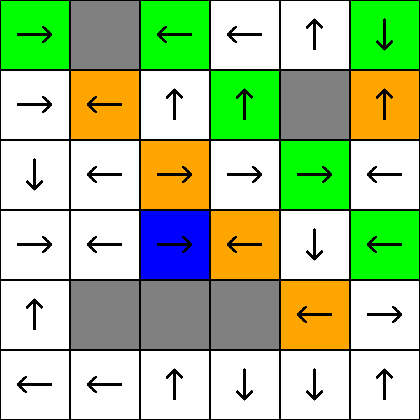

In [9]:
pi_env, pi_policy = init_pi_env()

pi_policy_initial_image_name = 'policy_iteration_policy_initial'
visualize_policy(pi_policy, pi_policy_initial_image_name)  # Visualize the initial policy and save the screenshot for later use

# Load the screenshot of the initial policy
img = Image.open(get_path() + '/window_capture/' + f'{pi_policy_initial_image_name}.png')
img

Now run the policy iteration algorithm to find the optimal policy and utility values.
Visualize the optimal policy and show the number of iterations it took to converge.

Policy Iteration converged in 7 iterations


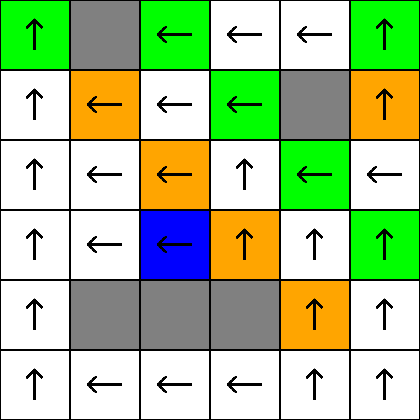

In [10]:
pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy)

print(f'Policy Iteration converged in {pi_iterations_cnt} iterations')

pi_policy_image_name = 'policy_iteration_policy'
visualize_policy(pi_policy, pi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{pi_policy_image_name}.png')
img

Visualize the learning curve of the policy iteration algorithm

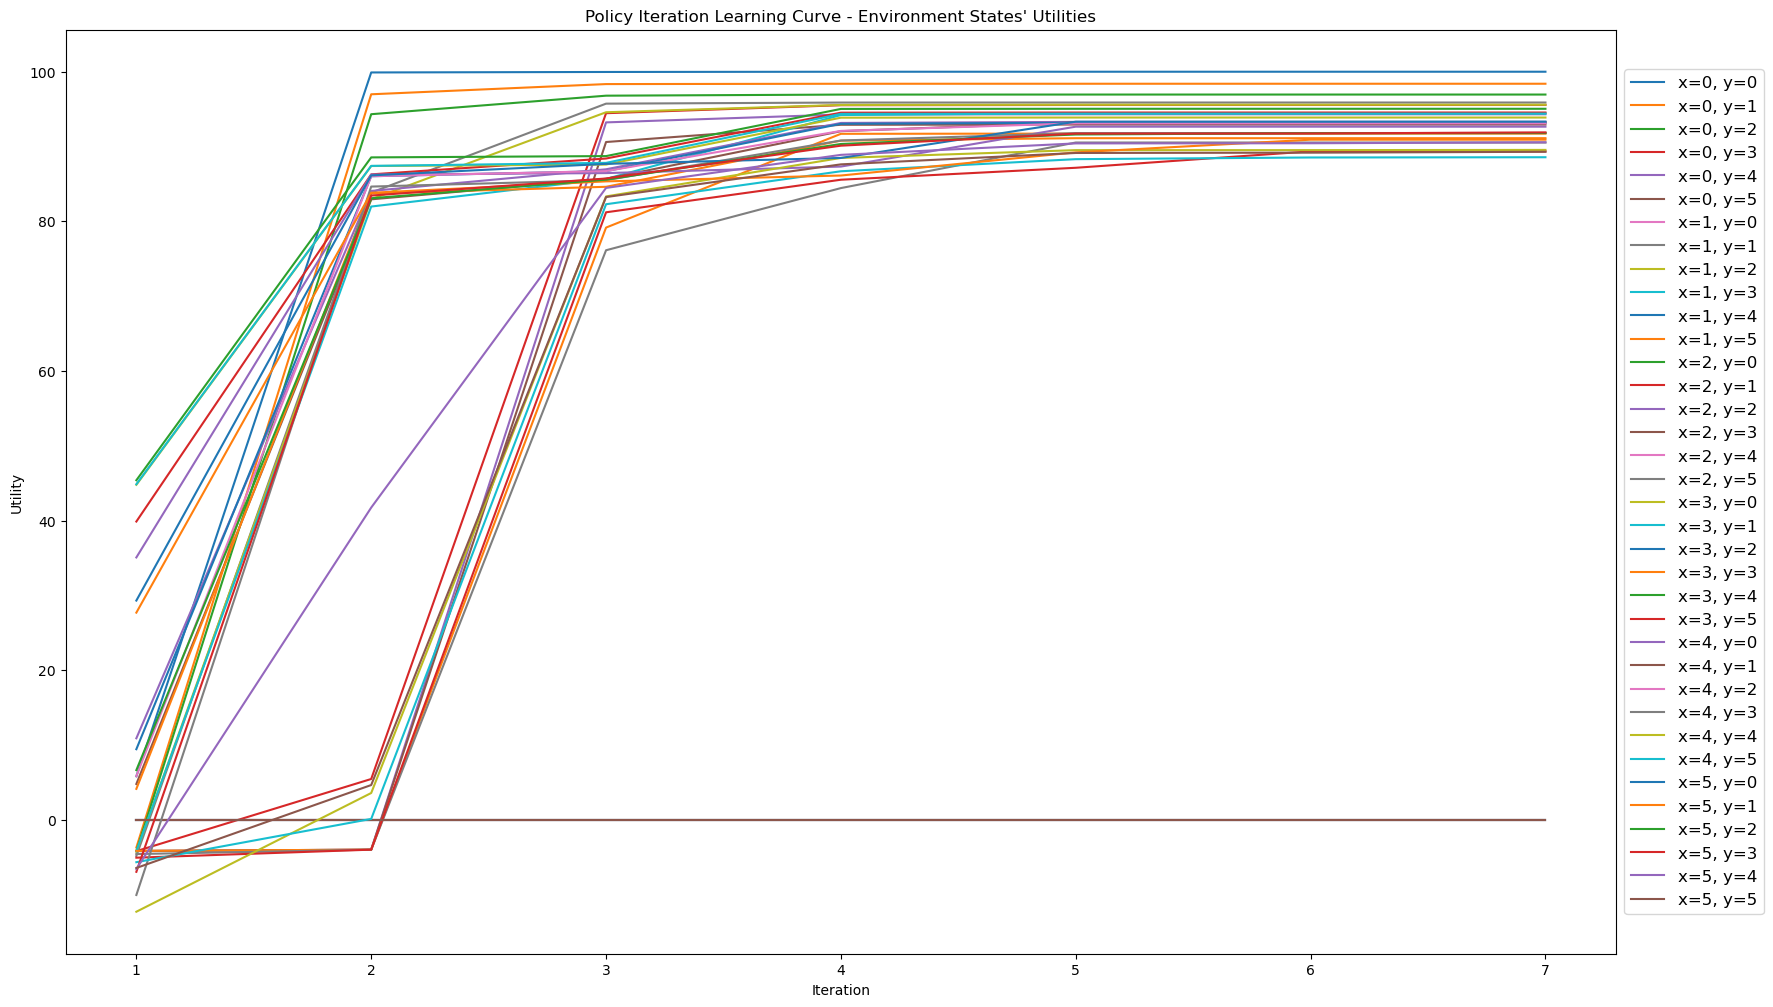

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualize the learning curve of the policy iteration algorithm
pi_results = pd.read_csv(get_path() + '/results/policy_iteration/pi_results.csv')

# Group the results by the 'x' and 'y' columns
groups = pi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Policy Iteration Learning Curve - Environment States' Utilities")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'policy_iteration_learning_curve.png')

## 2. Task 2 - Complex Environment

The goal of this task is to design a more complex environment and re-run the Value Iteration and Policy Iteration algorithms to compare the results with the previous environment.

### 2.1. Increase the Maze Size

One way to make the environment more complex is to increase the size of the maze. The size of the maze is increased to 10x10.

Visualize the maze environment

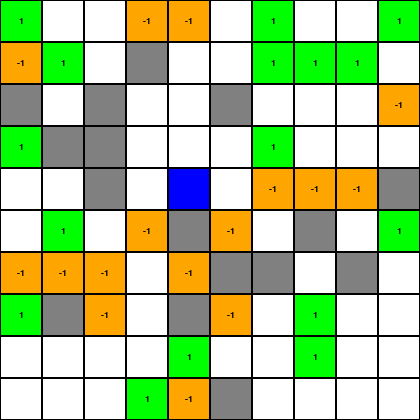

In [12]:
# Change the MAZE_CONFIG value
set_maze_config('increased_size')

increased_size_env_image_name = 'increased_size_env'

# Run the function to visualize the environment and save the screenshot for later use
visualize_env(increased_size_env_image_name)

# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + f'{increased_size_env_image_name}.png')
img

#### 2.1.1. Value Iteration

Now initialize the environment and run the value iteration algorithm to find the optimal policy and utility values.
Show the number of iterations it took to converge and visualize the optimal policy.

In [13]:
is_results_csv_name = 'is_vi_results'
vi_env = init_vi_env()  # Initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env, is_results_csv_name)  # Perform value iteration
vi_policy = generate_policy(vi_env)  # Generate the optimal policy
print(f'Value Iteration converged in {vi_iterations_cnt} iterations')

Value Iteration converged in 1145 iterations


Visualizing the optimal policy

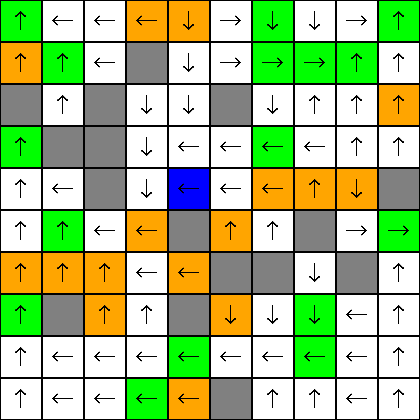

In [14]:
vi_policy_image_name = 'is_value_iteration_policy'
visualize_policy(vi_policy, vi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{vi_policy_image_name}.png')
img

Visualizing the utility values

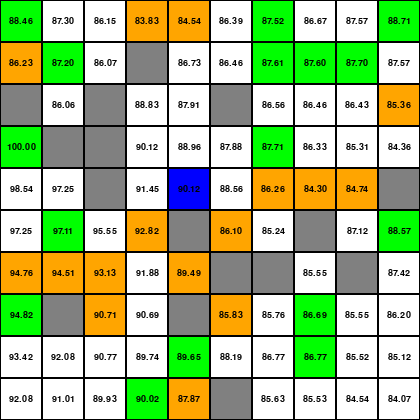

In [15]:
is_vi_utility_image_name = 'is_value_iteration_utility'
visualize_utility(vi_env, is_vi_utility_image_name)  # Visualize the utility values and save the screenshot for later use

# Load the screenshot of the utility values 
img = Image.open(get_path() + '/window_capture/' + f'{is_vi_utility_image_name}.png')
img

Visualizing the learning curve of the value iteration algorithm

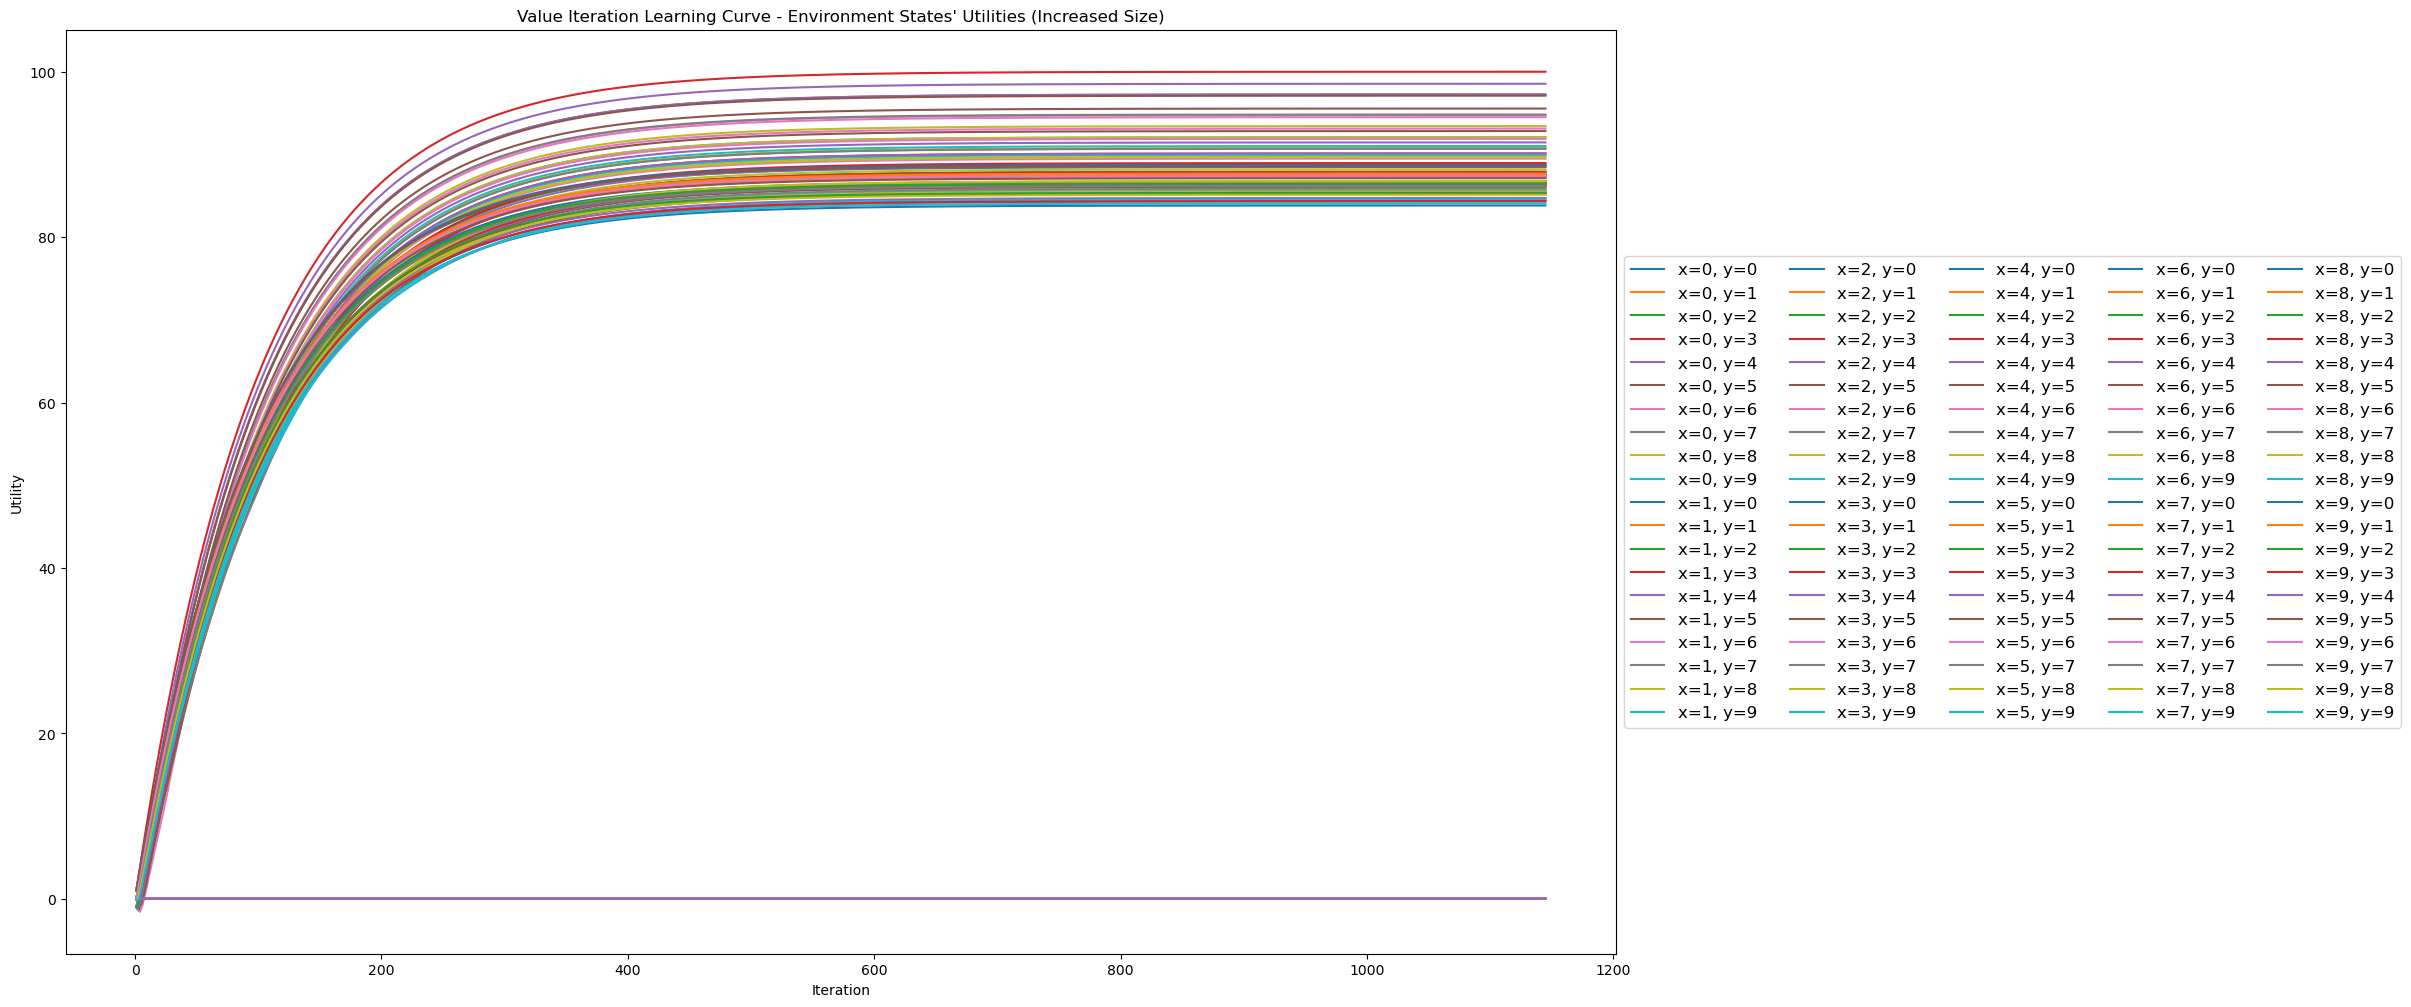

<Figure size 640x480 with 0 Axes>

In [16]:
# Visualize the learning curve of the value iteration algorithm
vi_results = pd.read_csv(get_path() + f'/results/value_iteration/{is_results_csv_name}.csv')

# Group the results by the 'x' and 'y' columns
groups = vi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Value Iteration Learning Curve - Environment States' Utilities (Increased Size)")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12}, ncol=5)
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'is_value_iteration_learning_curve.png')

#### 2.1.2. Policy Iteration

Now initialize the environment and visualize the initial policy that is randomly generated.

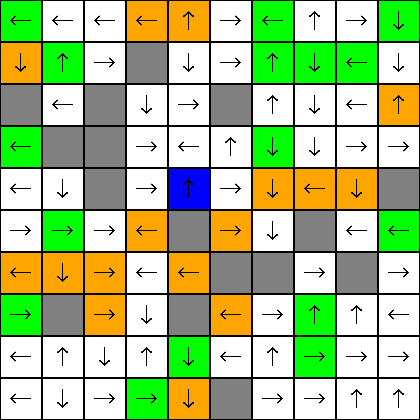

In [17]:
pi_env, pi_policy = init_pi_env()

is_pi_policy_initial_image_name = 'is_policy_iteration_policy_initial'
visualize_policy(pi_policy, is_pi_policy_initial_image_name)  # Visualize the initial policy and save the screenshot for later use

# Load the screenshot of the initial policy
img = Image.open(get_path() + '/window_capture/' + f'{is_pi_policy_initial_image_name}.png')
img

Now run the policy iteration algorithm to find the optimal policy and utility values.
Visualize the optimal policy and show the number of iterations it took to converge.

Policy Iteration converged in 12 iterations


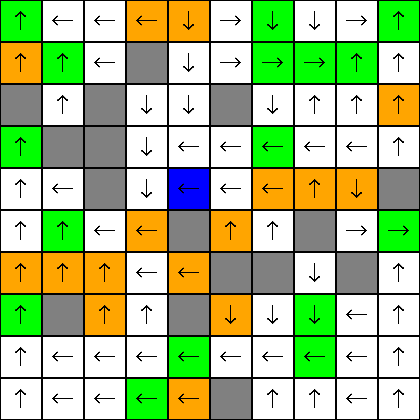

In [18]:
is_results_csv_name = 'is_pi_results'
pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy, is_results_csv_name)

print(f'Policy Iteration converged in {pi_iterations_cnt} iterations')

is_pi_policy_image_name = 'is_policy_iteration_policy'
visualize_policy(pi_policy, is_pi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{is_pi_policy_image_name}.png')
img

Visualize the learning curve of the policy iteration algorithm

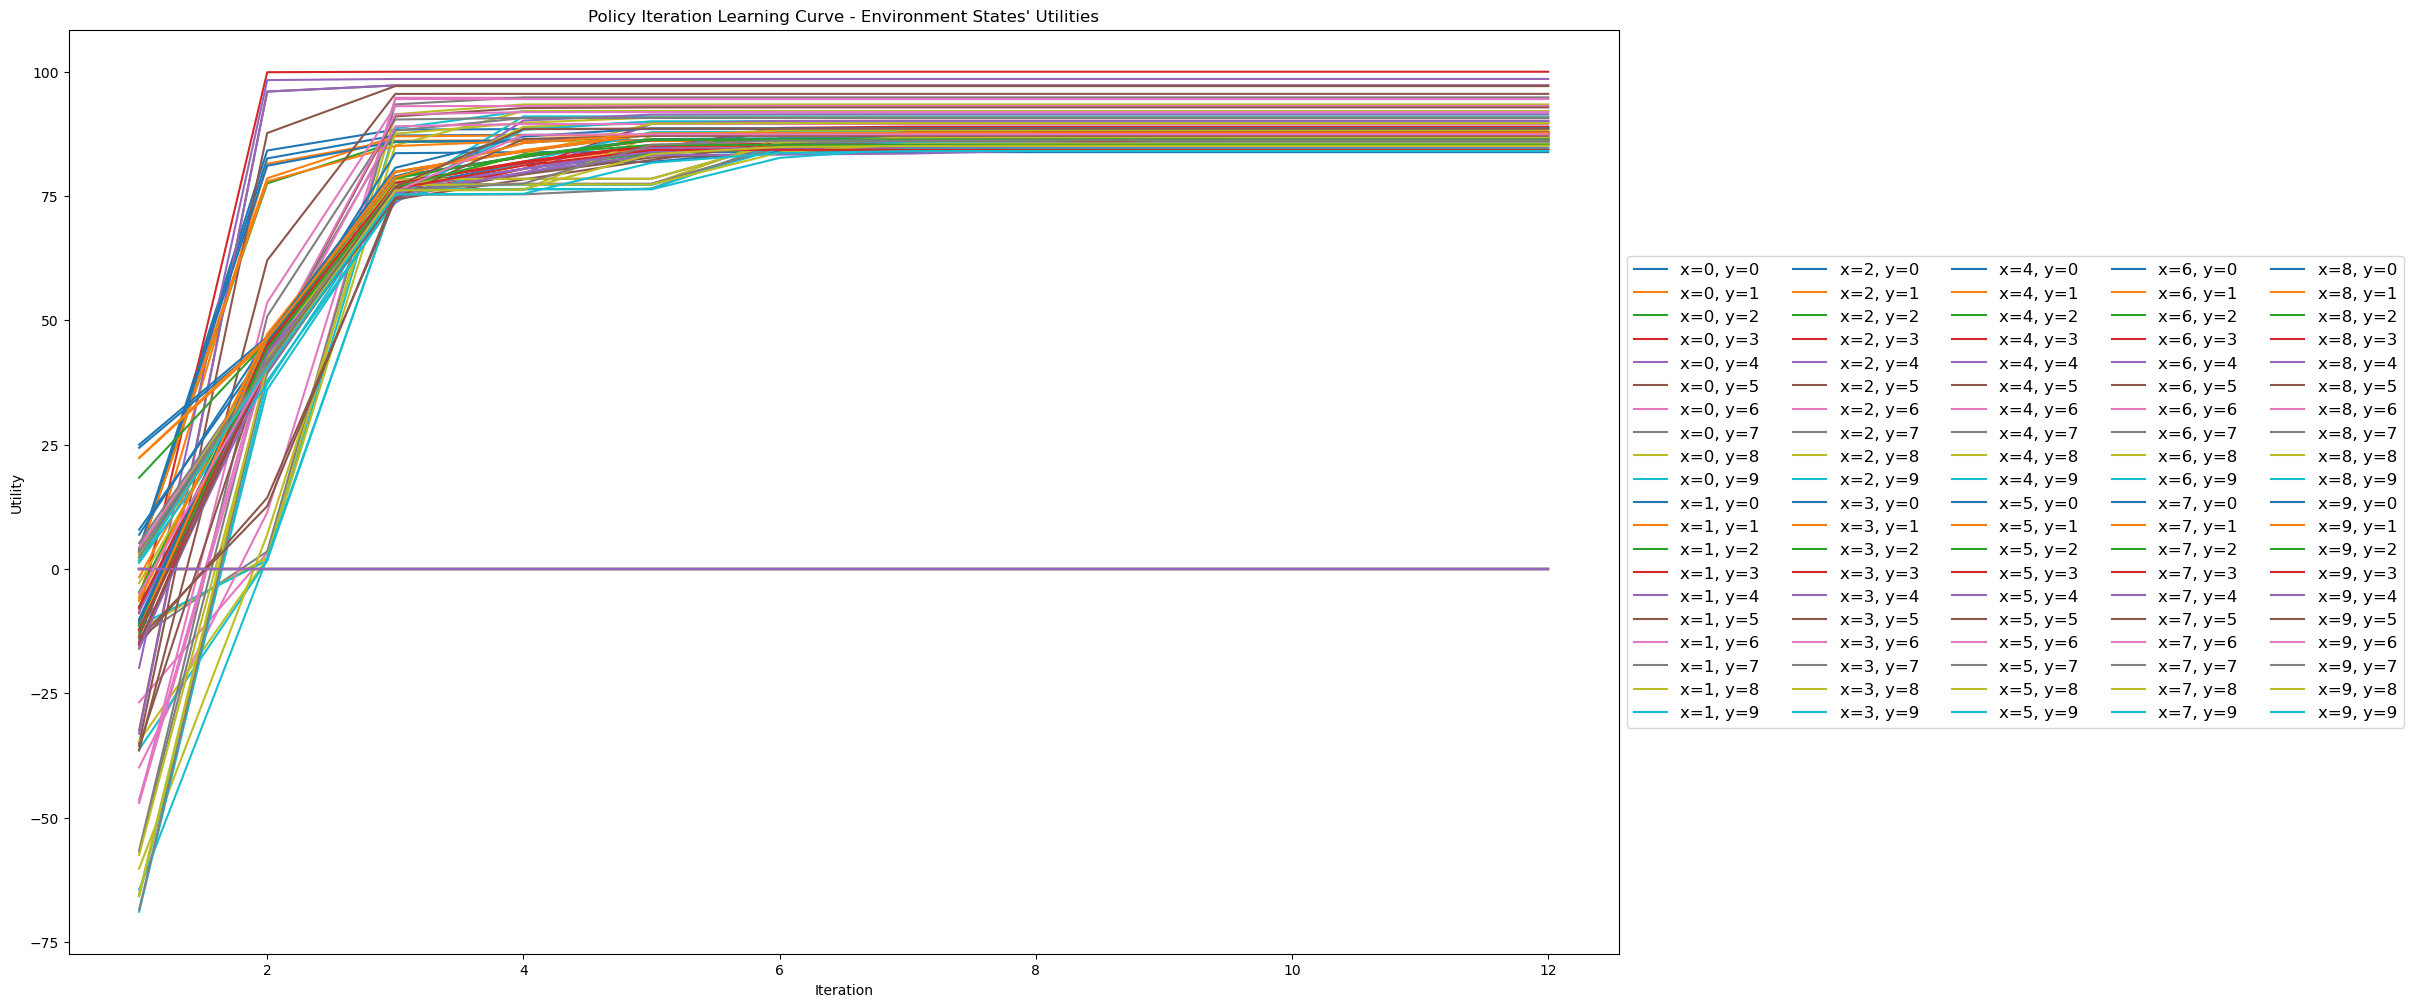

<Figure size 640x480 with 0 Axes>

In [19]:
# Visualize the learning curve of the policy iteration algorithm
pi_results = pd.read_csv(get_path() + f'/results/policy_iteration/{is_results_csv_name}.csv')

# Group the results by the 'x' and 'y' columns
groups = pi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')

plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Policy Iteration Learning Curve - Environment States' Utilities")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12}, ncol=5)
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'is_policy_iteration_learning_curve.png')

### 2.2. Labyrinth Maze Environment

We can also design a more complex environment by adding more walls and arranging them in a labyrinth type of maze environment. The environment is designed to be a labyrinth maze with a size of 10x10.

Visualize the maze environment

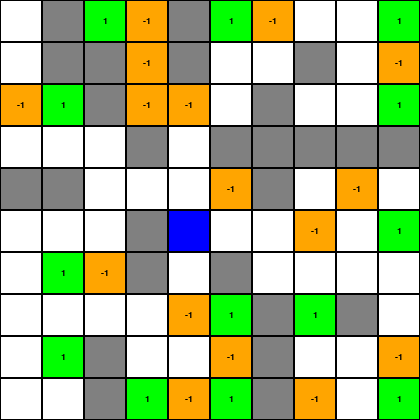

In [20]:
# Change the MAZE_CONFIG value
set_maze_config('labyrinth')

labyrinth_env_image_name = 'labyrinth_env'

# Run the function to visualize the environment and save the screenshot for later use
visualize_env(labyrinth_env_image_name)

# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + f'{labyrinth_env_image_name}.png')
img

#### 2.2.1. Value Iteration

Now initialize the environment and run the value iteration algorithm to find the optimal policy and utility values.
Show the number of iterations it took to converge and visualize the optimal policy.

In [21]:
l_results_csv_name = 'l_vi_results'
vi_env = init_vi_env()  # Initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env, l_results_csv_name)  # Perform value iteration
vi_policy = generate_policy(vi_env)  # Generate the optimal policy
print(f'Value Iteration converged in {vi_iterations_cnt} iterations')

Value Iteration converged in 1145 iterations


Visualizing the optimal policy

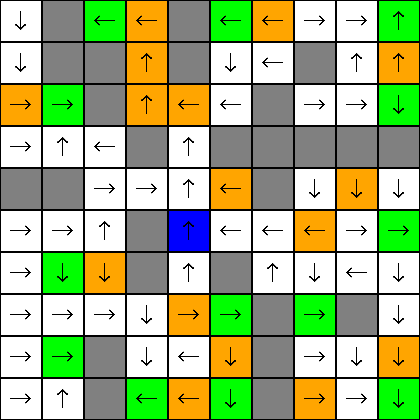

In [22]:
vi_policy_image_name = 'l_value_iteration_policy'
visualize_policy(vi_policy, vi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{vi_policy_image_name}.png')
img

Visualizing the utility values

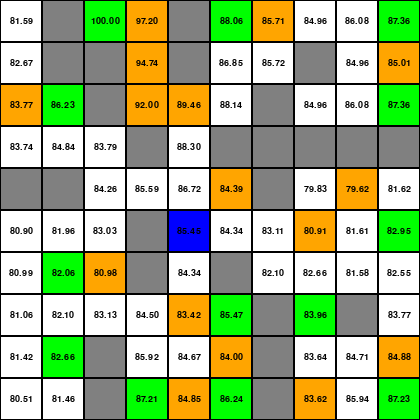

In [23]:
l_vi_utility_image_name = 'l_value_iteration_utility'
visualize_utility(vi_env, l_vi_utility_image_name)  # Visualize the utility values and save the screenshot for later use

# Load the screenshot of the utility values
img = Image.open(get_path() + '/window_capture/' + f'{l_vi_utility_image_name}.png')
img

Visualizing the learning curve of the value iteration algorithm

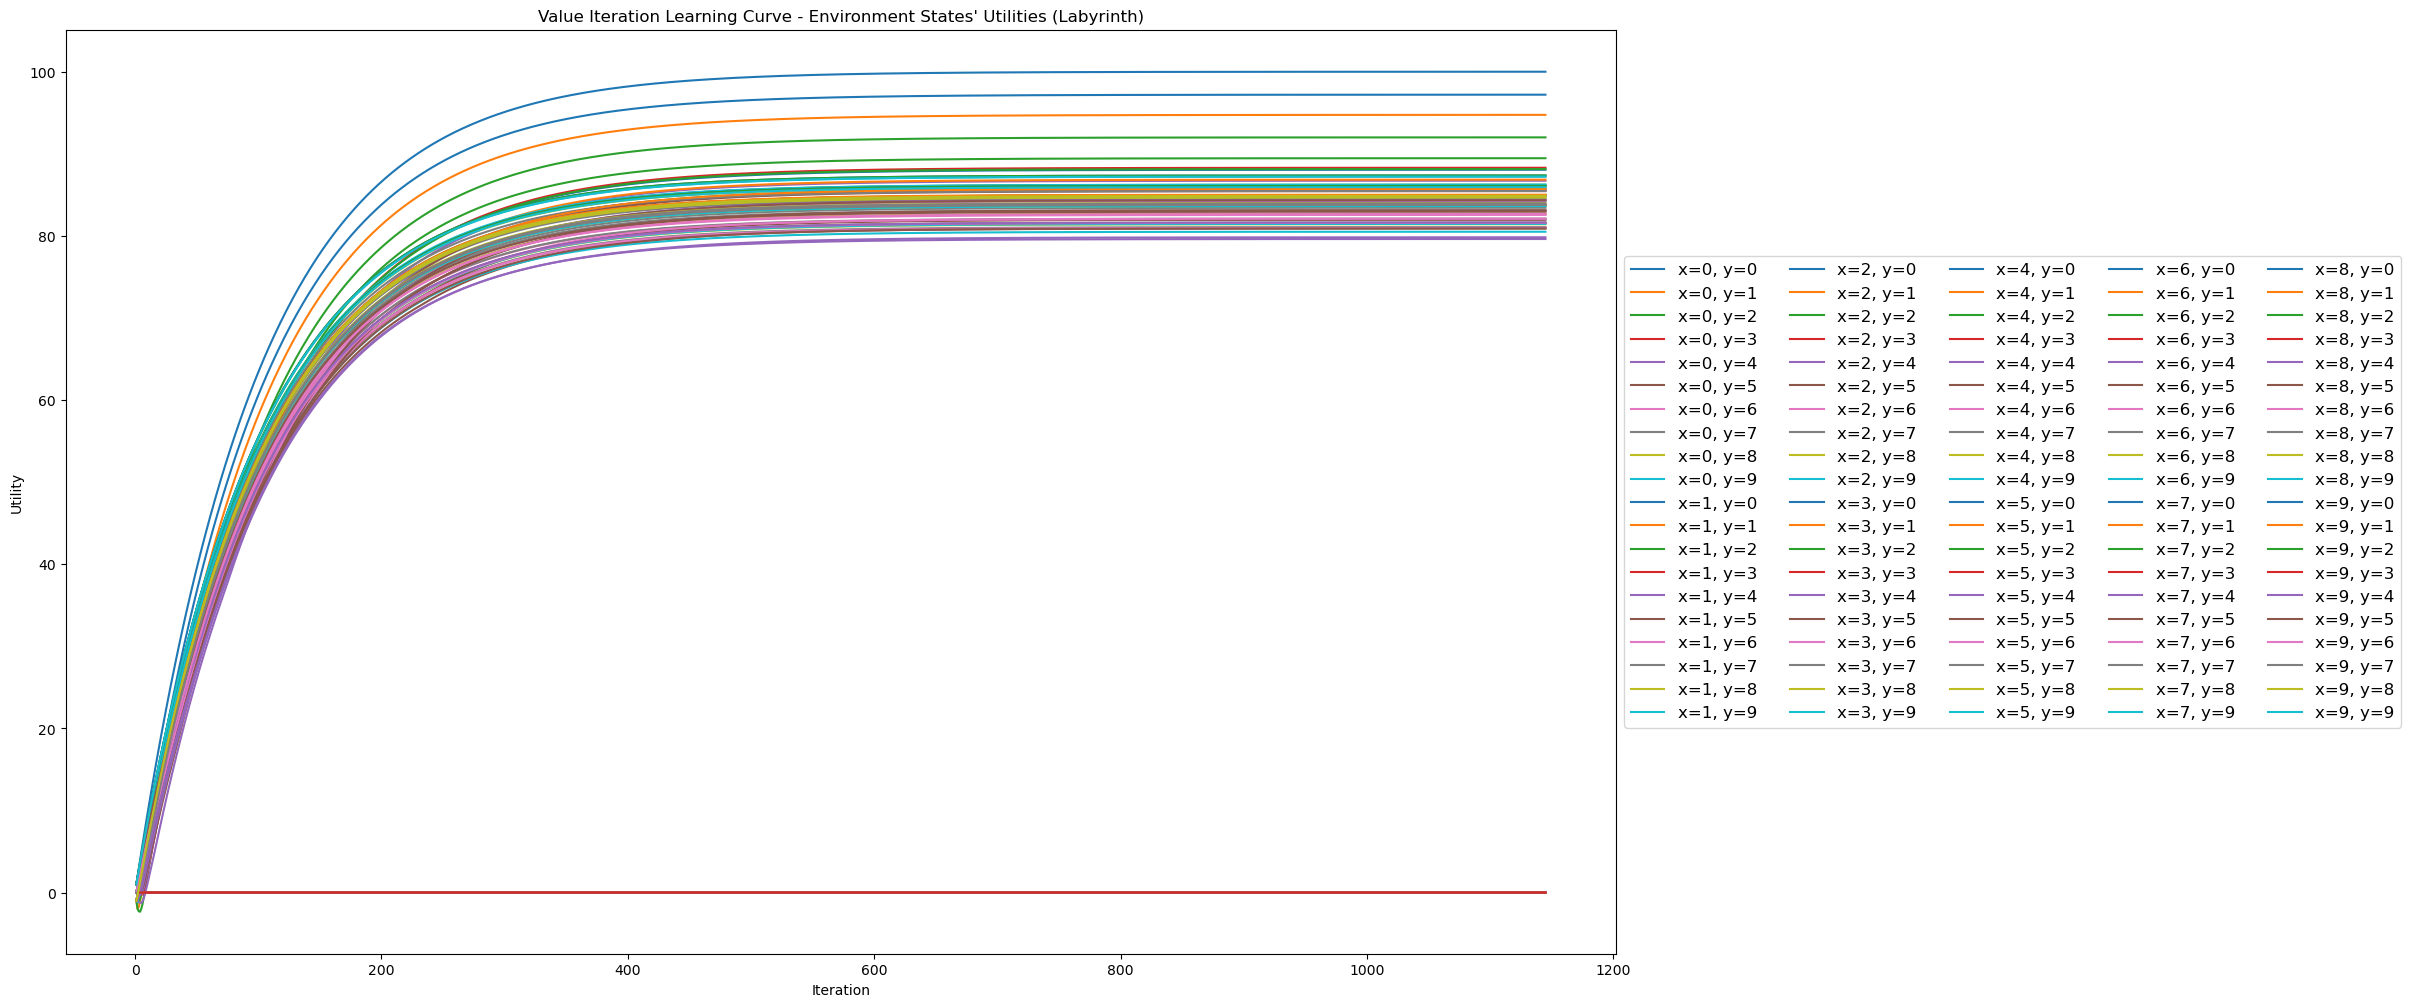

<Figure size 640x480 with 0 Axes>

In [24]:
# Visualize the learning curve of the value iteration algorithm
vi_results = pd.read_csv(get_path() + f'/results/value_iteration/{l_results_csv_name}.csv')

# Group the results by the 'x' and 'y' columns
groups = vi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')
    
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Value Iteration Learning Curve - Environment States' Utilities (Labyrinth)")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12}, ncol=5)
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'l_value_iteration_learning_curve.png')

#### 2.2.2. Policy Iteration

Now initialize the environment and visualize the initial policy that is randomly generated.

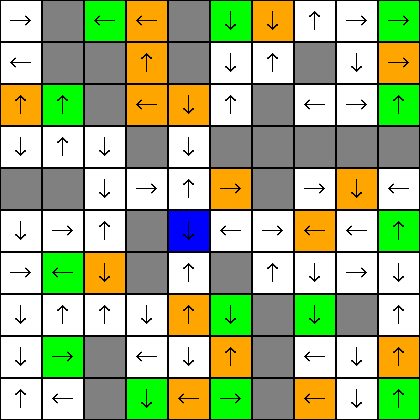

In [25]:
pi_env, pi_policy = init_pi_env()

l_pi_policy_initial_image_name = 'l_policy_iteration_policy_initial'
visualize_policy(pi_policy, l_pi_policy_initial_image_name)  # Visualize the initial policy and save the screenshot for later use

# Load the screenshot of the initial policy
img = Image.open(get_path() + '/window_capture/' + f'{l_pi_policy_initial_image_name}.png')
img

Now run the policy iteration algorithm to find the optimal policy and utility values.
Visualize the optimal policy and show the number of iterations it took to converge.

Policy Iteration converged in 7 iterations


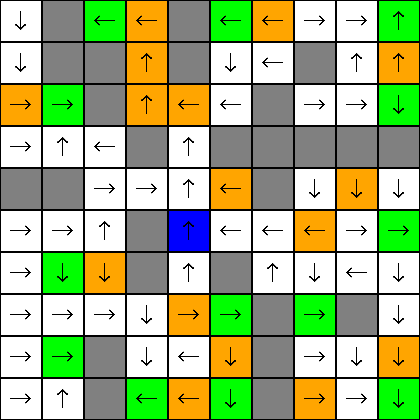

In [26]:
l_results_csv_name = 'l_pi_results'
pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy, l_results_csv_name)

print(f'Policy Iteration converged in {pi_iterations_cnt} iterations')

l_pi_policy_image_name = 'l_policy_iteration_policy'
visualize_policy(pi_policy, l_pi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{l_pi_policy_image_name}.png')
img

Visualize the learning curve of the policy iteration algorithm

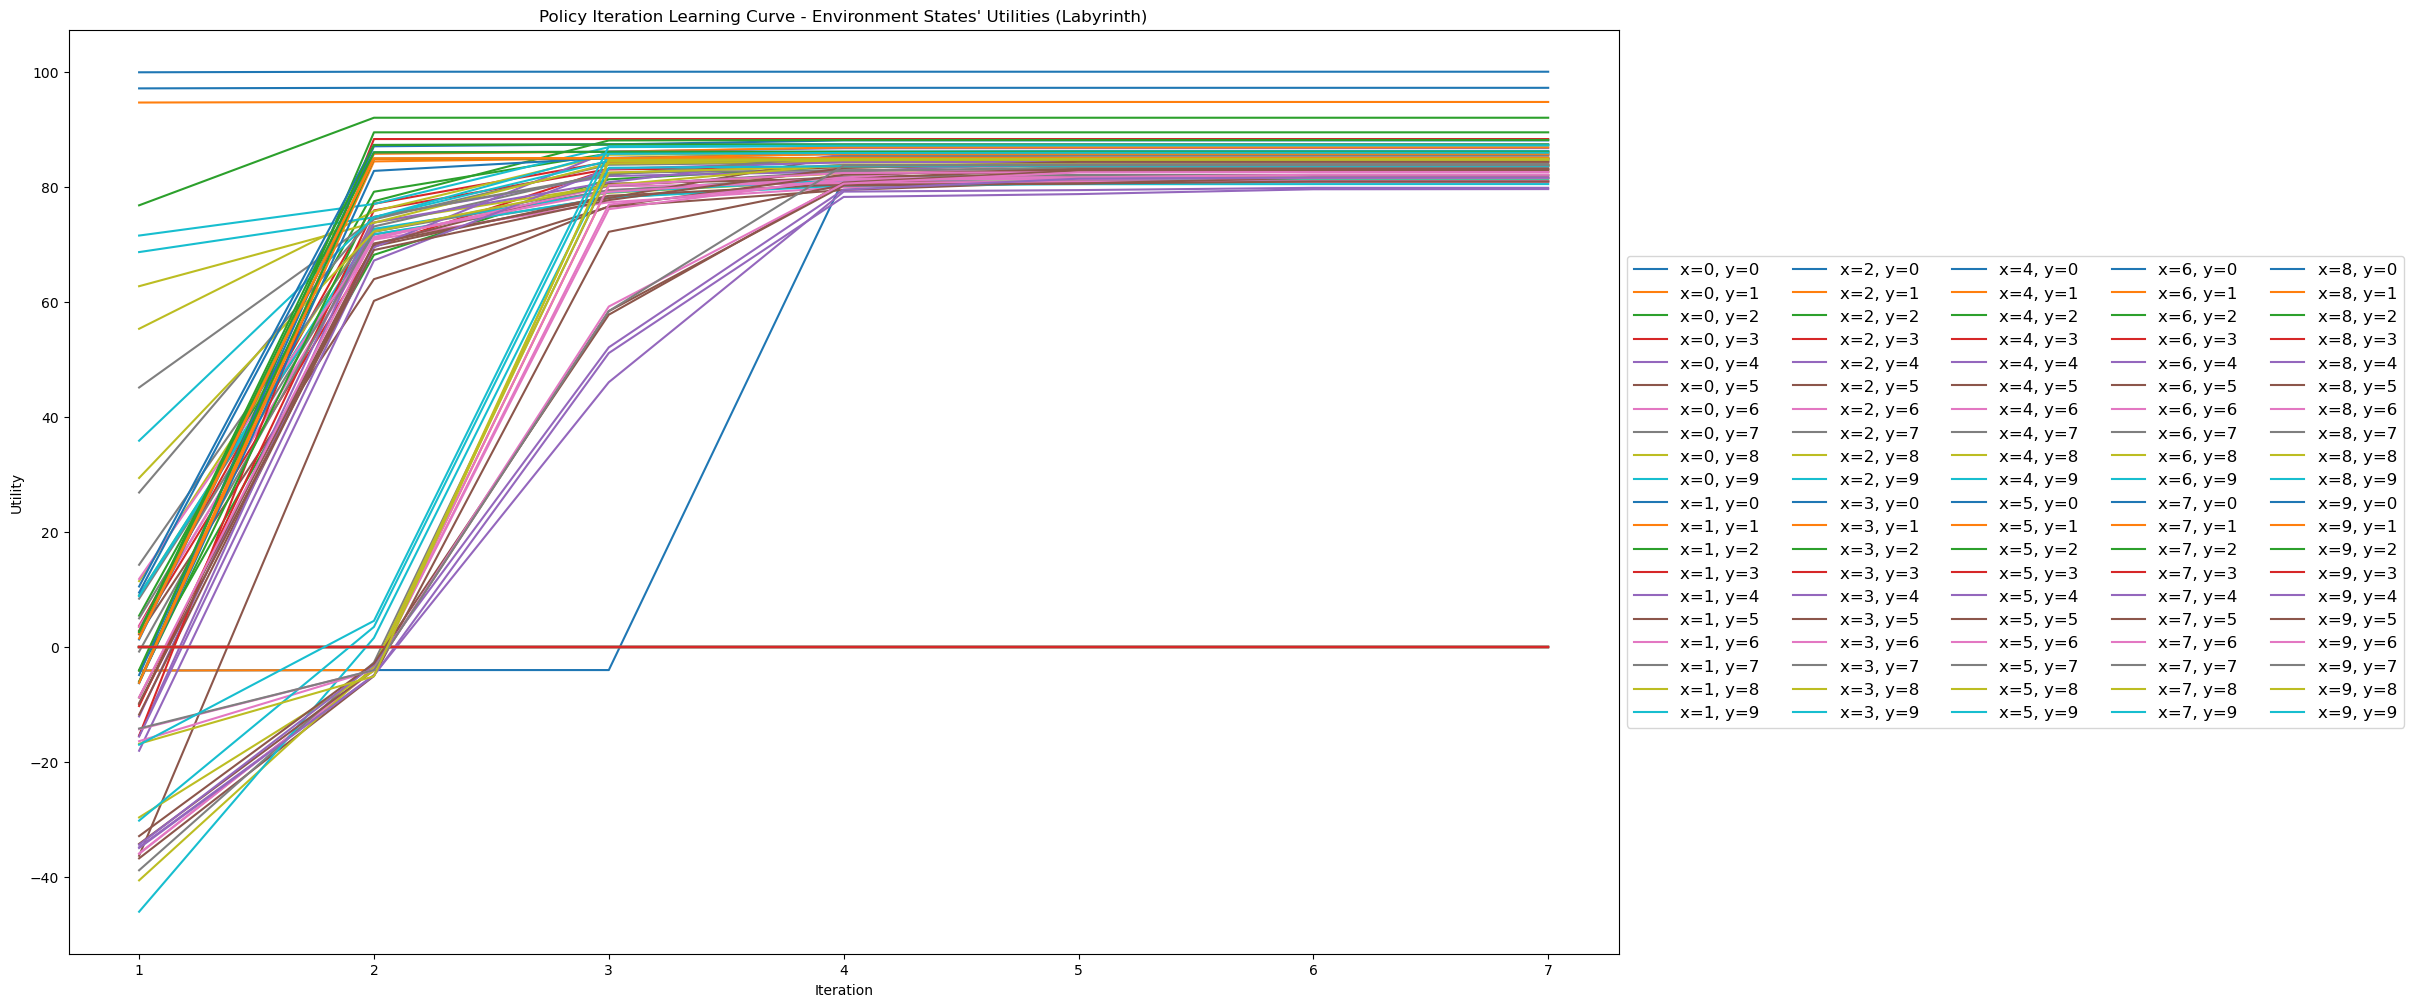

<Figure size 640x480 with 0 Axes>

In [27]:
# Visualize the learning curve of the policy iteration algorithm
pi_results = pd.read_csv(get_path() + f'/results/policy_iteration/{l_results_csv_name}.csv')

# Group the results by the 'x' and 'y' columns
groups = pi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')
    
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Policy Iteration Learning Curve - Environment States' Utilities (Labyrinth)")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12}, ncol=5)
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'l_policy_iteration_learning_curve.png')

### 2.3. Maze Environment with Blockages

Another way to make the environment more complex is to add blockages in the environment. The environment is designed to be a 10x10 maze with blockages.

Visualize the maze environment

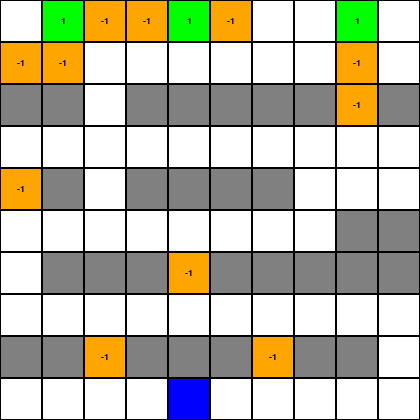

In [28]:
# Change the MAZE_CONFIG value
set_maze_config('blockages')

blockages_env_image_name = 'blockages_env'

# Run the function to visualize the environment and save the screenshot for later use
visualize_env(blockages_env_image_name)

# Load the screenshot of the environment
img = Image.open(get_path() + '/window_capture/' + f'{blockages_env_image_name}.png')
img

#### 2.3.1. Value Iteration

Now initialize the environment and run the value iteration algorithm to find the optimal policy and utility values.
Show the number of iterations it took to converge and visualize the optimal policy.

In [29]:
b_results_csv_name = 'b_vi_results'
vi_env = init_vi_env()  # Initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env, b_results_csv_name)  # Perform value iteration
vi_policy = generate_policy(vi_env)  # Generate the optimal policy
print(f'Value Iteration converged in {vi_iterations_cnt} iterations')

Value Iteration converged in 1119 iterations


Visualizing the optimal policy

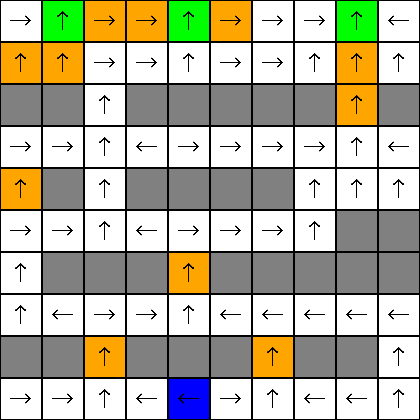

In [30]:
vi_policy_image_name = 'b_value_iteration_policy'
visualize_policy(vi_policy, vi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{vi_policy_image_name}.png')
img

Visualizing the utility values

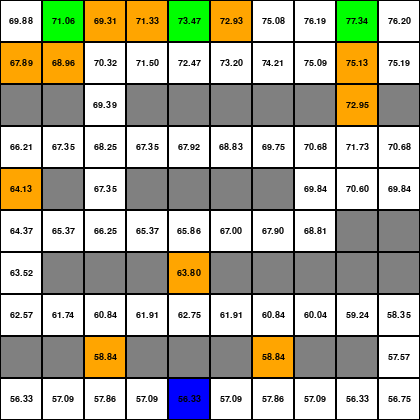

In [31]:
b_vi_utility_image_name = 'b_value_iteration_utility'
visualize_utility(vi_env, b_vi_utility_image_name)  # Visualize the utility values and save the screenshot for later use

# Load the screenshot of the utility values
img = Image.open(get_path() + '/window_capture/' + f'{b_vi_utility_image_name}.png')
img

Visualizing the learning curve of the value iteration algorithm

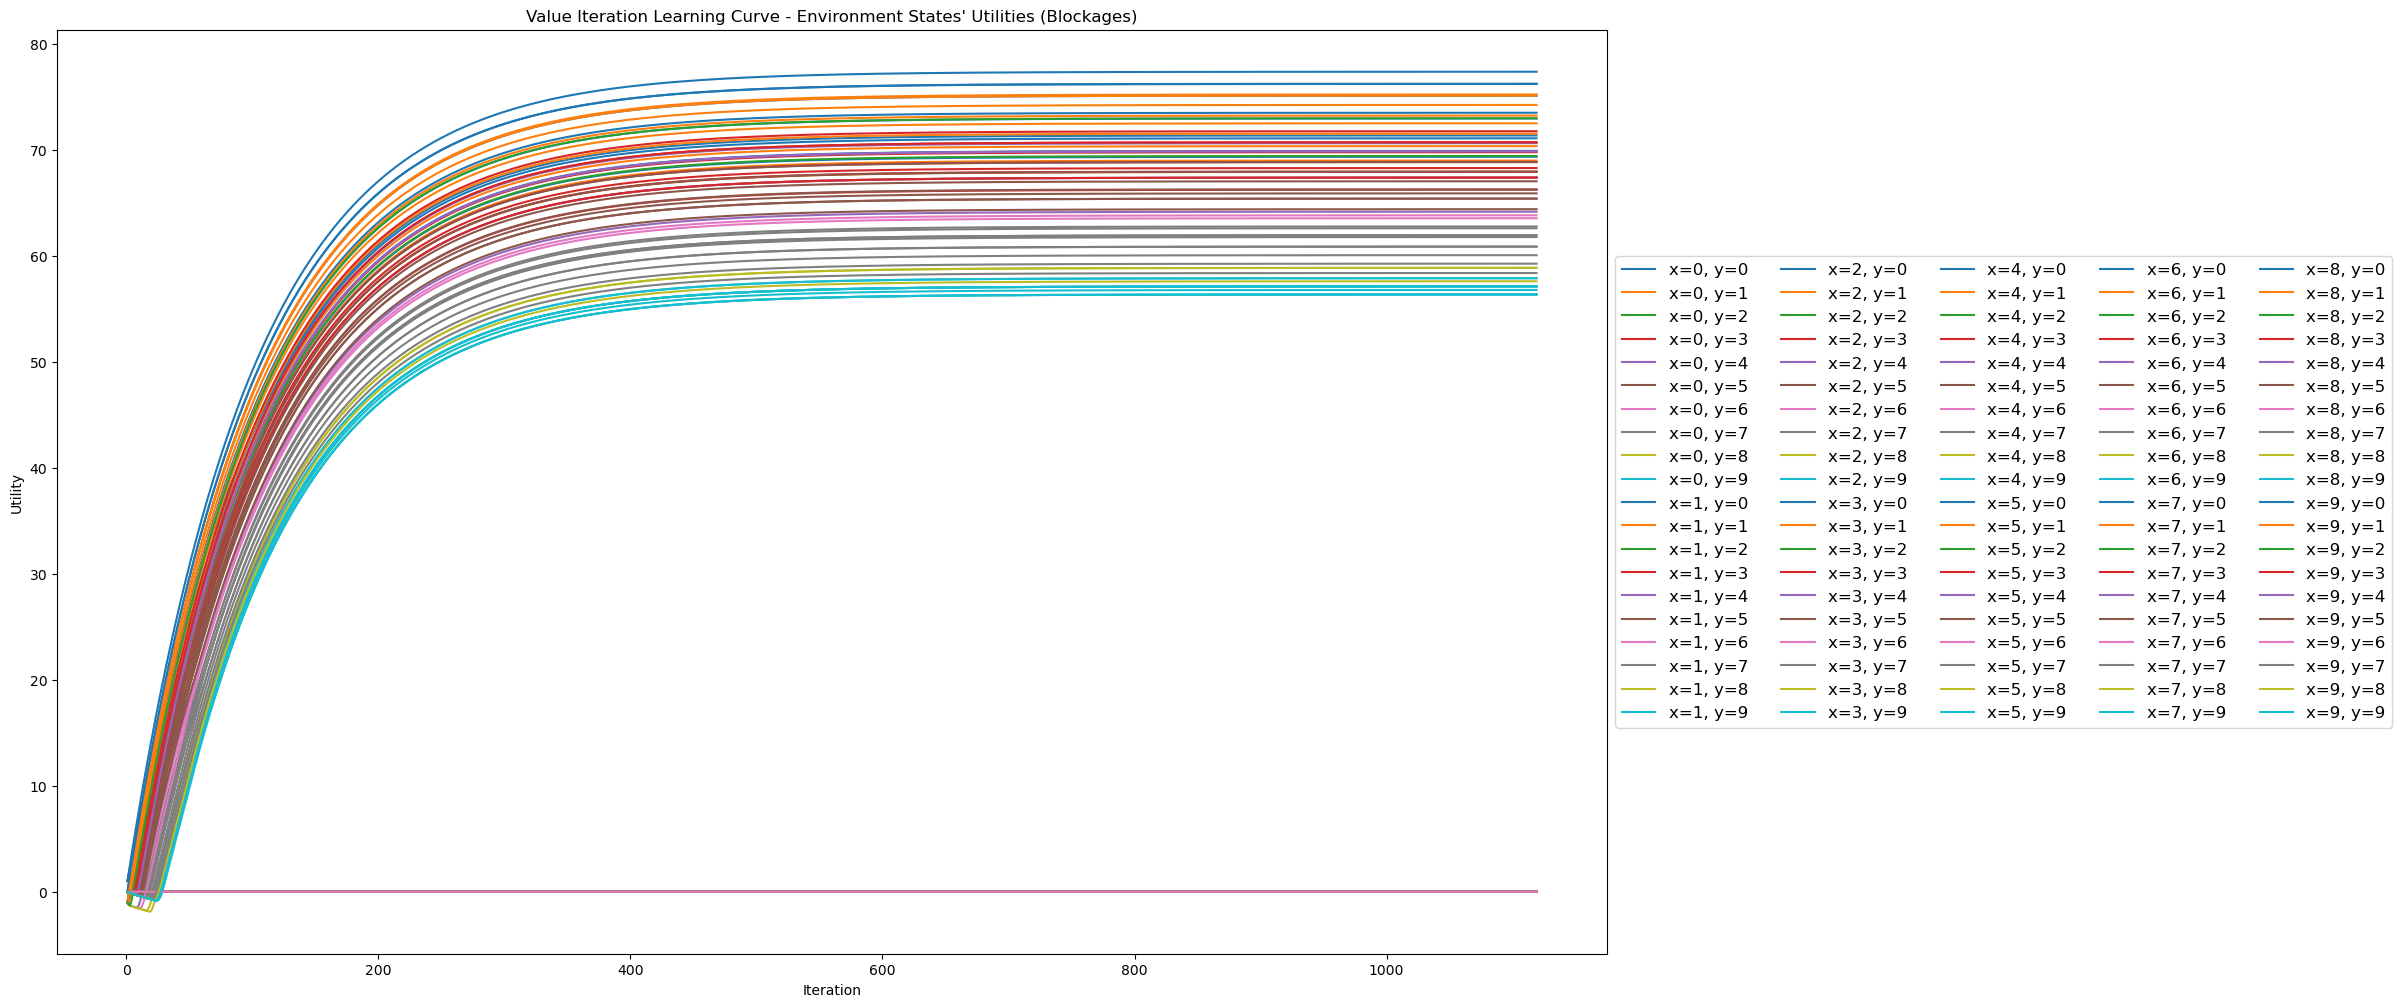

<Figure size 640x480 with 0 Axes>

In [32]:
# Visualize the learning curve of the value iteration algorithm
vi_results = pd.read_csv(get_path() + f'/results/value_iteration/{b_results_csv_name}.csv')

# Group the results by the 'x' and 'y' columns
groups = vi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')
    
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Value Iteration Learning Curve - Environment States' Utilities (Blockages)")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12}, ncol=5)
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'b_value_iteration_learning_curve.png')

#### 2.3.2. Policy Iteration

Now initialize the environment and visualize the initial policy that is randomly generated.

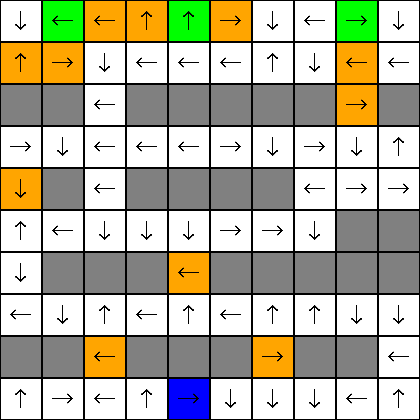

In [33]:
pi_env, pi_policy = init_pi_env()

b_pi_policy_initial_image_name = 'b_policy_iteration_policy_initial'
visualize_policy(pi_policy, b_pi_policy_initial_image_name)  # Visualize the initial policy and save the screenshot for later use

# Load the screenshot of the initial policy
img = Image.open(get_path() + '/window_capture/' + f'{b_pi_policy_initial_image_name}.png')
img

Now run the policy iteration algorithm to find the optimal policy and utility values.
Visualize the optimal policy and show the number of iterations it took to converge.

Policy Iteration converged in 9 iterations


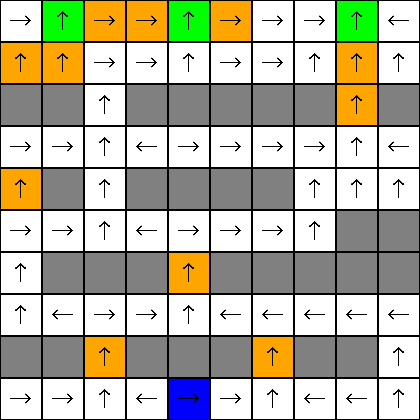

In [34]:
b_results_csv_name = 'b_pi_results'
pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy, b_results_csv_name)

print(f'Policy Iteration converged in {pi_iterations_cnt} iterations')

b_pi_policy_image_name = 'b_policy_iteration_policy'
visualize_policy(pi_policy, b_pi_policy_image_name)  # Visualize the optimal policy and save the screenshot for later use

# Load the screenshot of the optimal policy
img = Image.open(get_path() + '/window_capture/' + f'{b_pi_policy_image_name}.png')
img

Visualize the learning curve of the policy iteration algorithm

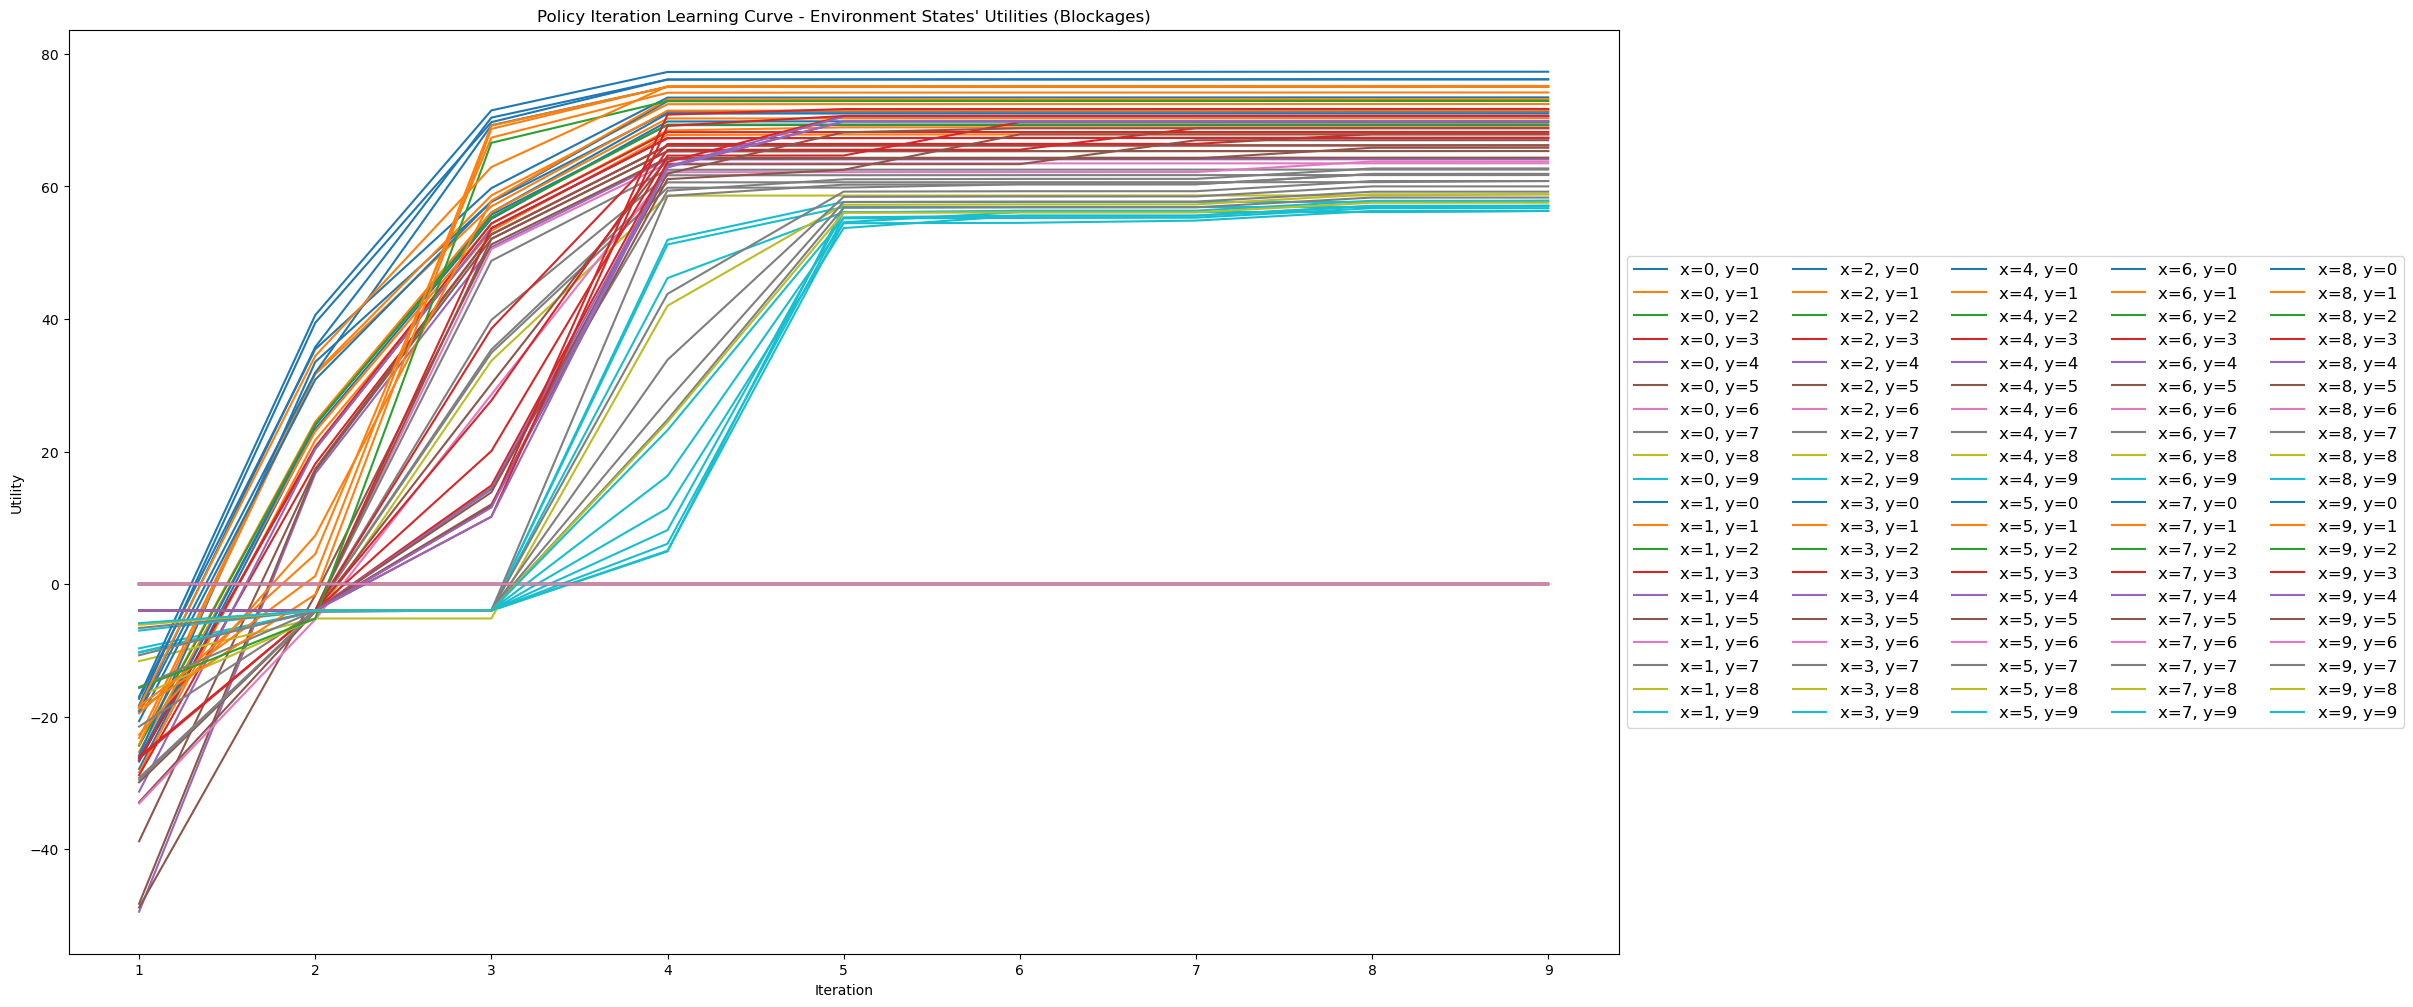

<Figure size 640x480 with 0 Axes>

In [35]:
# Visualize the learning curve of the policy iteration algorithm
pi_results = pd.read_csv(get_path() + f'/results/policy_iteration/{b_results_csv_name}.csv')

# Group the results by the 'x' and 'y' columns
groups = pi_results.groupby(['x', 'y'])

# Define the figure size
plt.figure(figsize=(20, 12))

# Iterate over the groups (each group represents a state of the environment)
for name, group in groups:
    # Plot the Utility values over the Iteration number 
    plt.plot(group['Iteration'], group['Utility'], label=f'x={name[0]}, y={name[1]}')
    
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.title("Policy Iteration Learning Curve - Environment States' Utilities (Blockages)")
plt.xlabel('Iteration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12}, ncol=5)
plt.show()

# Save the learning curve plot as an image
plt.savefig(get_path() + '/plots/' + 'b_policy_iteration_learning_curve.png')